In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_1_1_1_1',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_1_1_1_1',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_hrefanchor(s)
display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

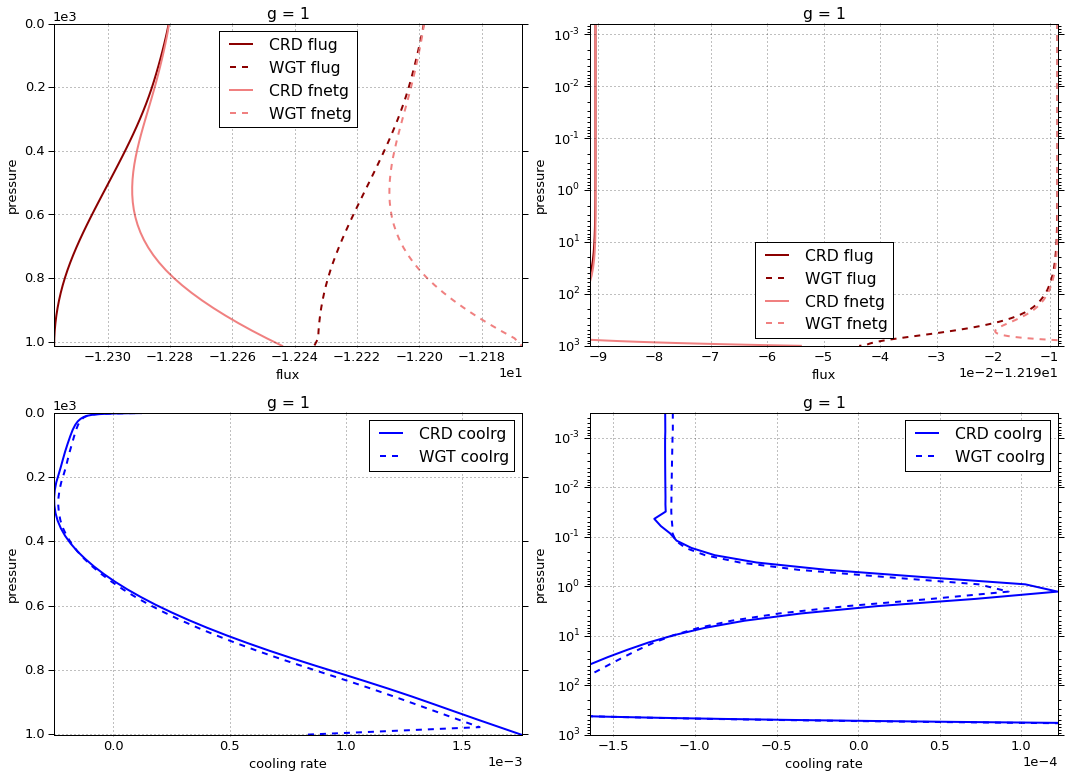

# Figure: flux, cooling rate. g-group 2

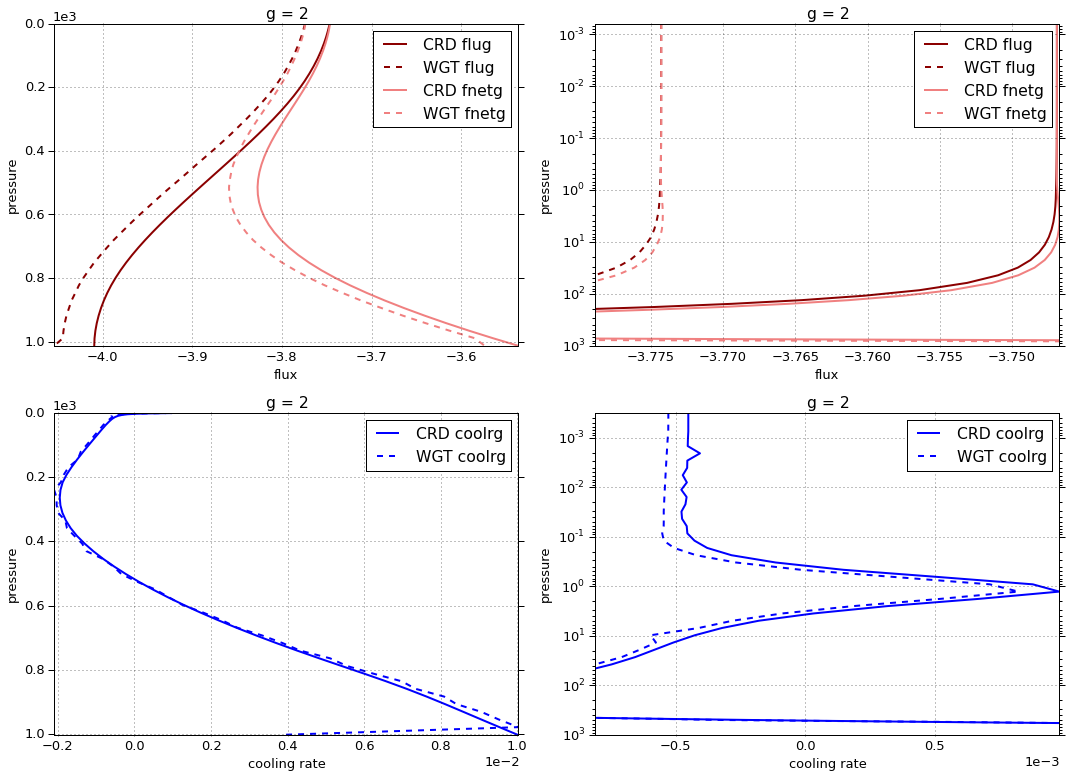

# Figure: flux, cooling rate. g-group 3

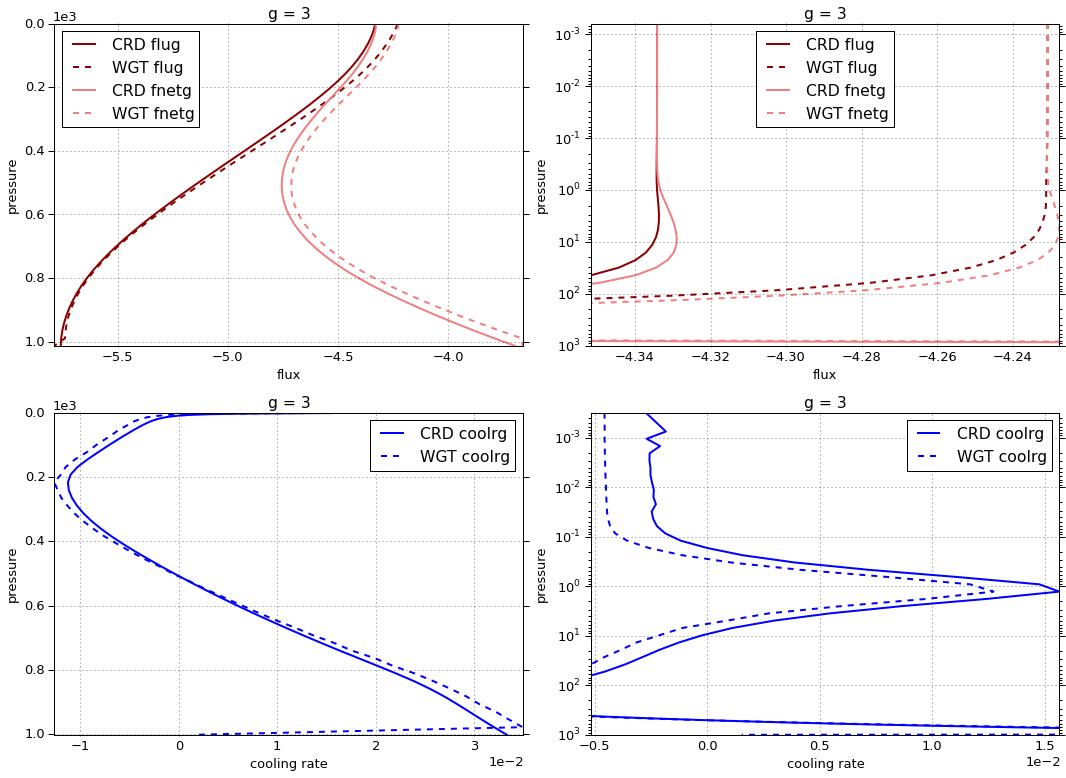

# Figure: flux, cooling rate. g-group 4

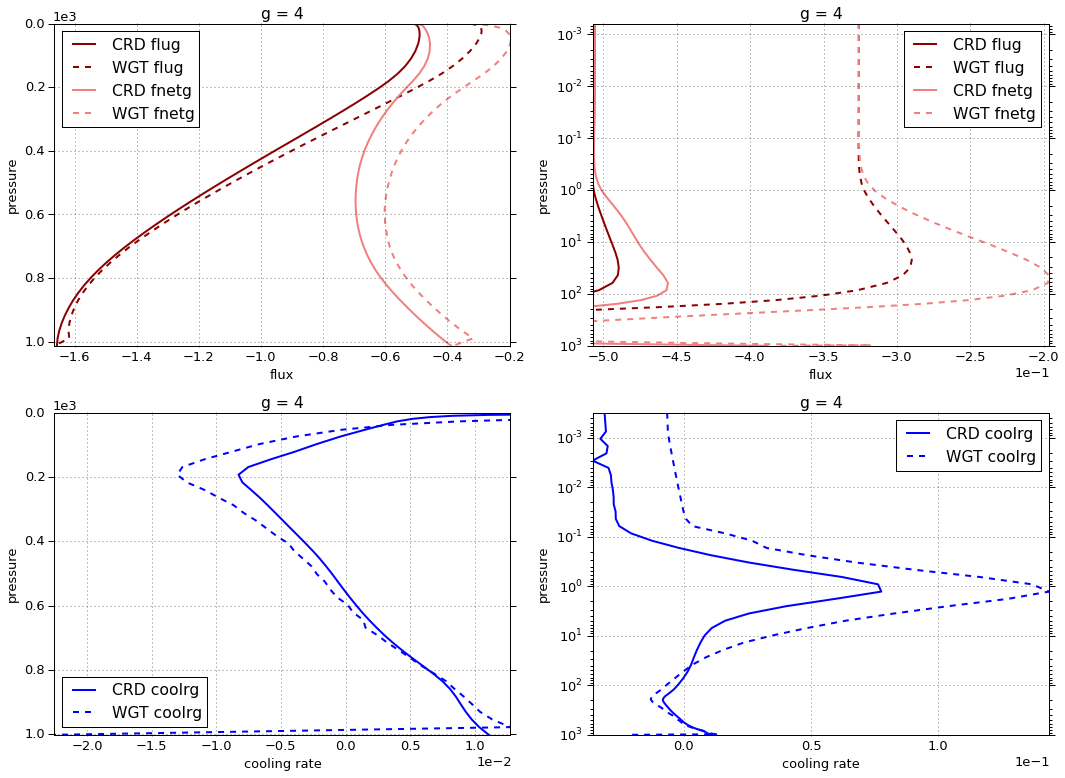

# Figure: flux, cooling rate. g-group 5

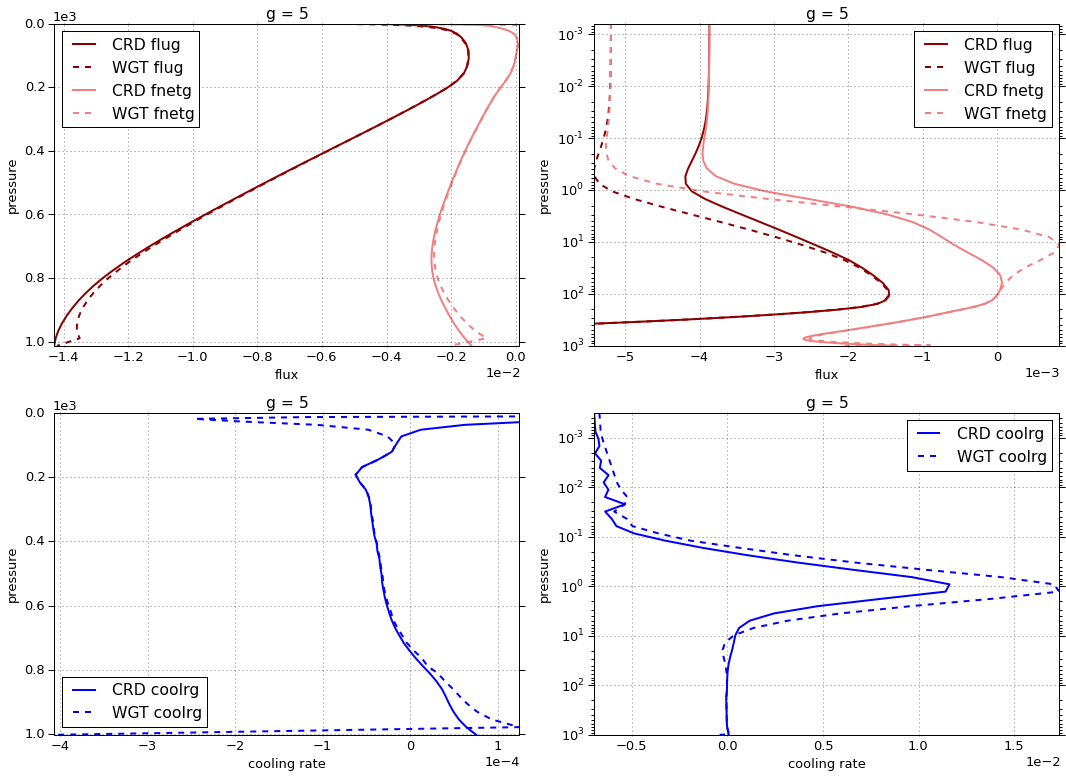

# Figure: flux, cooling rate. g-group total

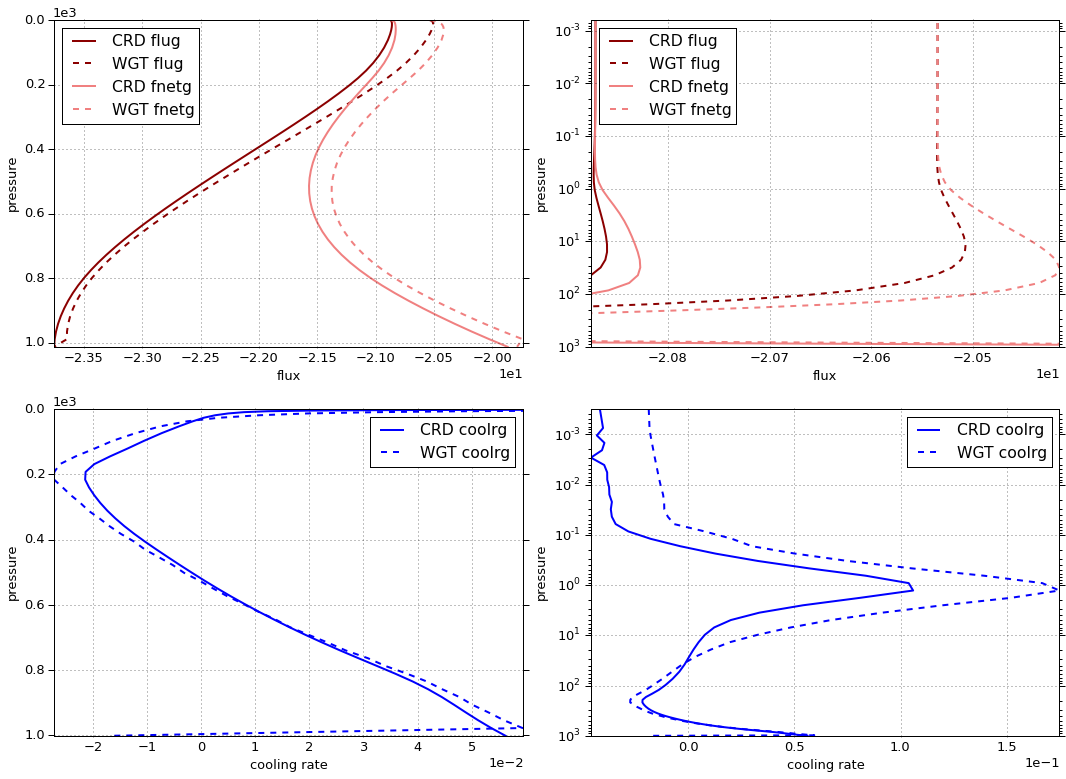

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.280442  0.000000 -12.280442
  1013     76    -12.317184  0.073131 -12.244053
2 0        1      -3.746907  0.000000  -3.746907
  1013     76     -4.009301  0.472992  -3.536309
3 0        1      -4.334173  0.000000  -4.334173
  1013     76     -5.757332  2.058822  -3.698510
4 0        1      -0.505946  0.000000  -0.505946
  1013     76     -1.657052  1.269028  -0.388024
5 0        1      -0.003871  0.000000  -0.003871
  1013     76     -0.014302  0.012939  -0.001363


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.198583  0.000000 -12.198583
  1013     76    -12.233727  0.066535 -12.167192
2 0        1      -3.774282  0.000000  -3.774282
  1013     76     -4.054005  0.480114  -3.573891
3 0        1      -4.230840  0.000000  -4.230840
  1013     76     -5.787381  2.123642  -3.663739
4 0        1      -0.325988  0.000000  -0.325988
  1013     76     -1.665843  1.284956  -0.380887
5 0        1      -0.005195  0.000000  -0.005195
  1013     76     -0.014215  0.012167  -0.002048


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.081859  0.000000  0.081859
  1013     76     0.083457 -0.006596  0.076861
2 0        1     -0.027375  0.000000 -0.027375
  1013     76    -0.044704  0.007122 -0.037582
3 0        1      0.103333  0.000000  0.103333
  1013     76    -0.030050  0.064820  0.034770
4 0        1      0.179958  0.000000  0.179958
  1013     76    -0.008791  0.015928  0.007137
5 0        1     -0.001325  0.000000 -0.001325
  1013     76     0.000087 -0.000772 -0.000685

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000118
  1001.112500 75     0.001756
2 0.000312    1     -0.000451
  1001.112500 75     0.010012
3 0.000312    1     -0.002722
  1001.112500 75     0.033339
4 0.000312    1     -0.031187
  1001.112500 75     0.011089
5 0.000312    1     -0.006968
  1001.112500 75     0.000076


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000114
  1001.112500 75     0.000814
2 0.000312    1     -0.000528
  1001.112500 75     0.003874
3 0.000312    1     -0.004559
  1001.112500 75     0.001538
4 0.000312    1     -0.006565
  1001.112500 75    -0.022554
5 0.000312    1     -0.006694
  1001.112500 75    -0.000407


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000005
  1001.112500 75    -0.000942
2 0.000312    1     -0.000077
  1001.112500 75    -0.006138
3 0.000312    1     -0.001837
  1001.112500 75    -0.031800
4 0.000312    1      0.024622
  1001.112500 75    -0.033643
5 0.000312    1      0.000273
  1001.112500 75    -0.000482

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871338,0.000000,-20.871338
1013,76,-23.755171,3.886912,-19.868258



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.534888,0.000000,-20.534888
1013,76,-23.755171,3.967414,-19.787757



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,3.364503e-01,0.000000,0.336450
1013,76,-2.690000e-07,0.080501,0.080501


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.041446
1001.112500,75,0.056271



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.018460
1001.112500,75,-0.016735



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.022986
1001.112500,75,-0.073006


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.533212,0.514992
2,0.162061,0.170658
3,0.236182,0.243626
4,0.067939,0.070125
5,0.000606,0.000598


In [17]:
s = 'Table: flux. g-group 1'
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=1).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -12.280442  0.000000e+00 -12.280442   1     1   
0.000624      1     2 -12.280442  1.033480e-09 -12.280442   1     2   
0.000876      1     3 -12.280442  1.455932e-09 -12.280442   1     3   
0.001229      1     4 -12.280442  2.060783e-09 -12.280442   1     4   
0.001723      1     5 -12.280442  2.931807e-09 -12.280442   1     5   
0.002417      1     6 -12.280442  4.186298e-09 -12.280442   1     6   
0.003391      1     7 -12.280442  5.993258e-09 -12.280442   1     7   
0.004757      1     8 -12.280442  8.596030e-09 -12.280442   1     8   
0.006672      1     9 -12.280442  1.234483e-08 -12.280442   1     9   
0.009359      1    10 -12.280442  1.774441e-08 -12.280442   1    10   
0.013128      1    11 -12.280442  2.552159e-08 -12.280442   1    11   
0.018415      1    12 -12.280442  3.672361e-08 -12.280442   1    12   
0.025830      1    13 -12.280442  5.285900e-08 -12.280442   1    13   
0.036232      1    14 -12.280442  7.610849e-08 -12.280442   1    14   
0.050823      1    15 -12.280443  1.099607e-07 -12.280443   1    15   
0.071291      1    16 -12.280443  1.622140e-07 -12.280443   1    16   
0.100000      1    17 -12.280444  2.526324e-07 -12.280443   1    17   
0.140271      1    18 -12.280444  4.231737e-07 -12.280444   1    18   
0.196760      1    19 -12.280445  7.526249e-07 -12.280445   1    19   
0.275997      1    20 -12.280447  1.392603e-06 -12.280445   1    20   
0.387100      1    21 -12.280449  2.640945e-06 -12.280446   1    21   
0.543100      1    22 -12.280452  5.088015e-06 -12.280447   1    22   
0.761700      1    23 -12.280455  9.836901e-06 -12.280445   1    23   
1.068500      1    24 -12.280460  1.835182e-05 -12.280442   1    24   
1.498800      1    25 -12.280466  3.093176e-05 -12.280436   1    25   
2.102400      1    26 -12.280476  4.570622e-05 -12.280430   1    26   
2.949000      1    27 -12.280491  6.192703e-05 -12.280429   1    27   
4.136600      1    28 -12.280514  7.947497e-05 -12.280434   1    28   
5.802500      1    29 -12.280546  9.859403e-05 -12.280448   1    29   
8.139200      1    30 -12.280594  1.198151e-04 -12.280474   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -12.290720  2.120487e-03 -12.288600   1    47   
347.300000    1    48 -12.291827  2.550830e-03 -12.289277   1    48   
371.075000    1    49 -12.292976  3.062237e-03 -12.289914   1    49   
394.850000    1    50 -12.294162  3.663014e-03 -12.290499   1    50   
418.625000    1    51 -12.295379  4.361190e-03 -12.291018   1    51   
442.400000    1    52 -12.296621  5.164366e-03 -12.291456   1    52   
466.175000    1    53 -12.297881  6.081434e-03 -12.291799   1    53   
489.950000    1    54 -12.299153  7.117945e-03 -12.292035   1    54   
513.725000    1    55 -12.300431  8.281998e-03 -12.292149   1    55   
537.500000    1    56 -12.301709  9.580078e-03 -12.292129   1    56   
561.275000    1    57 -12.302979  1.101991e-02 -12.291960   1    57   
585.050000    1    58 -12.304236  1.260960e-02 -12.291626   1    58   
608.825000    1    59 -12.305472  1.435535e-02 -12.291116   1    59   
632.600000    1    60 -12.306679  1.626657e-02 -12.290413   1    60   
656.375000    1    61 -12.307851  1.834928e-02 -12.289502   1    61   
680.150000    1    62 -12.308981  2.061142e-02 -12.288369   1    62   
703.925000    1    63 -12.310059  2.306005e-02 -12.286999   1    63   
727.700000    1    64 -12.311080  2.570270e-02 -12.285378   1    64   
751.475000    1    65 -12.312036  2.854443e-02 -12.283491   1    65   
775.250000    1    66 -12.312919  3.159295e-02 -12.281326   1    66   
799.025000    1    67 -12.313723  3.485288e-02 -12.278870   1    67   
822.800000    1    68 -12.314443  3.832849e-02 -12.276114   1    68   
846.575000    1    69 -12.315077  4.

In [18]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')